In [1]:
# Plot in vivo spectrum data from the Shimadzu UV-1800
# Jackson M. Tsuji, 2022

In [2]:
import pandas as pd
from plotnine import *

In [3]:
def read_shimadzu_csv_spectra(filepath, sample_name, normalize_chlorosome=False, start_nm=None, end_nm=None, multiplier=1, offset=0):
    
    spectrum_data = pd.read_csv(filepath, sep=',', skiprows=1)\
      .rename(columns={'WL/nm': 'Wavelength (nm)', 'Abs':'Absorbance'})
    
    spectrum_data['Sample'] = sample_name
    
    if normalize_chlorosome is True:
        spectrum_data_chlorosome = spectrum_data[(spectrum_data['Wavelength (nm)'] > 700) & (spectrum_data['Wavelength (nm)'] < 800)]
        chlorosome_peak_height = spectrum_data_chlorosome['Absorbance'].max()
        chlorosome_peak_location = spectrum_data_chlorosome[spectrum_data_chlorosome['Absorbance'] == chlorosome_peak_height]['Wavelength (nm)'].to_list()[0]
        
        print('Normalizing sample "' + sample_name + '" to chlorosome peak height ' + str(chlorosome_peak_height) + ' at wavelength ' + str(chlorosome_peak_location))
        spectrum_data['Absorbance'] = spectrum_data['Absorbance'] / chlorosome_peak_height
    
    if start_nm is not None:
        spectrum_data = spectrum_data[spectrum_data['Wavelength (nm)'] >= start_nm]
    
    if end_nm is not None:
        spectrum_data = spectrum_data[spectrum_data['Wavelength (nm)'] <= end_nm]
    
    spectrum_data['Absorbance'] = spectrum_data['Absorbance'] * multiplier + offset
    
    return(spectrum_data)

In [4]:
# Whole cell absorbance spectrum
spectrum_chx_cells = read_shimadzu_csv_spectra('input/Ca-Chx-allophototropha-L227-S17-whole-cell-raw.csv', 
                                               'Ca. Chx. allophototropha', 
                                               normalize_chlorosome=False, start_nm=600, end_nm=900)
spectrum_chx_cells.head()

,Wavelength (nm),Absorbance,Sample
200,900.0,0.480,Ca. Chx. allophototropha
201,899.0,0.480,Ca. Chx. allophototropha
202,898.0,0.480,Ca. Chx. allophototropha
203,897.0,0.481,Ca. Chx. allophototropha
204,896.0,0.481,Ca. Chx. allophototropha


/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


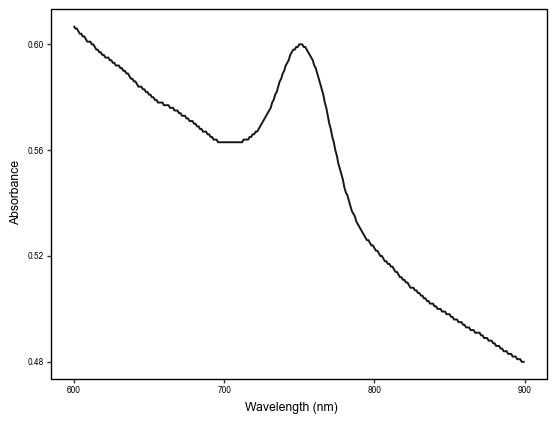

<ggplot: (385805731)>

In [5]:
spectrum_plot_chx_cells = (ggplot(spectrum_chx_cells, aes(x='Wavelength (nm)', y='Absorbance'))
                + geom_path(aes(group='Sample'), size=0.8, alpha=0.9, colour='black')
                + theme_bw()
                + theme(panel_grid=element_blank(),
                       text=element_text(colour='black', family='Arial'),
                       panel_border=element_rect(colour='black'),
                       axis_text=element_text(size=6),
                       axis_title=element_text(size=8.8))
                + ylab('Absorbance')
                )

spectrum_plot_chx_cells

In [6]:
spectrum_plot_chx_cells.save('in_vivo_spectra_Chx_cells.pdf', width=58, height=45, units='mm', verbose=False)

/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/jmtsuji/miniconda3/envs/jupyterlab/lib/python3.12/site-packages/plotnine/utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
